## 人工数据集生成

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 设置随机数种子
np.random.seed(5)

D:\SoftWare\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\SoftWare\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\SoftWare\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\SoftWare\Anaconda3\envs\tensorflow1\lib\site-packages\tensorf

In [2]:
# 直接采用np生成等差数列的方法，生成500个点，每个点的取值在0~100之间
x_data = np.linspace(0,100,500)

# y=3.1234x+2.98+噪声，其中，噪声的维度与x_data一致
y_data = 3.1234 * x_data + 2.98 + np.random.randn(*x_data.shape) * 40

# np.random.randn(d0, d1, ..., dn)是从标准正态分布中返回一个或多个样本值
# 标准正态分布又称为u分布，是以0为均值，1为标准差的正态分布，记为N(0,1)

## 利用matplotlib画图


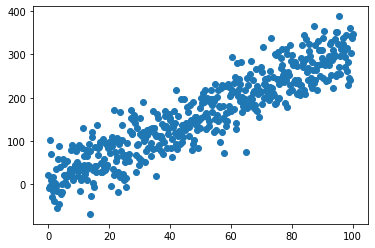

In [3]:
# 画出随机生成数据的散点图
plt.scatter(x_data, y_data)

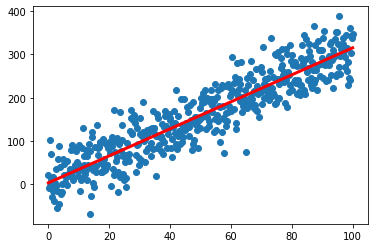

In [4]:
# 画出随机生成数据的散点图
plt.scatter(x_data, y_data)

# 画出我们想要学习得到的目标线性函数y=2x+1
plt.plot(x_data, 2.98+3.1234*x_data, color='red', linewidth=3)

## 构建模型

In [11]:
# 定义训练数据的占位符，x是特征值，y是标签值
x = tf.placeholder('float', name='x')
y = tf.placeholder('float', name='y')


# 定义模型函数
def model(x, w ,b):
    return tf.multiply(x,w) +b


# 创建变量
# TensorFlow变量的声明函数是tf.Variable
# tf.Variable的作用是保存和更新参数
# 变量的初始值可以是随机数、常数或者通过其他变量的初始值计算得到

# 构建线性函数的斜率，变量w
w = tf.Variable(3.0, name='w0')

# 构建线性函数的截距，变量b
b = tf.Variable(2.0, name='b0')

# pred是预测值，前向计算
pred = model(x, w, b)

## 训练模型

In [29]:
# 设置训练参数

# 迭代次数（训练轮数）
train_epochs = 10

# 学习率(建议一般设成0.1-0.01之间)
learning_rate = 0.000001

display_step = 20 # 控制显示loss值的粒度

## 关于学习率（learning_rate）的设置

学习率的作用：控制参数更新的幅度。  
如果学习率设置过大，可能导致参数在极值附近来回摆动，无法保证收敛。  
如果学习率设置过小，虽然能保证收敛，但优化速度会大大降低，我们需要更多迭代次数才能达到较理想的优化效果。

## 定义损失函数


In [30]:
# 损失函数用于描述预测值与真实值之间的误差，从而指导模型收敛方向
# 常见损失函数：均方差（Mean Square Error, MSE）和交叉熵（cross-entropy）

# L2损失函数
# 采用均方差作为损失函数
loss_function = tf.reduce_mean(tf.square(y-pred))

## 定义优化器


In [31]:
# 定义优化器Optimizer，初始化一个GradientDescentOptimizer
# 设置学习率和优化目标：最小化损失

# 梯度下降优化器
optimmizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

## 创建会话

In [32]:
# 声明会话
sess = tf.Session()

In [33]:
# 变量初始化
# 在真正执行计算之前，需要将所有变量初始化
# 通过tf.global_variables_initializer函数可实现对所有变量的初始化

init = tf.global_variables_initializer()

sess.run(init)

## 迭代训练

### 显示损失值

Train Epoch: 01 Step:020 loss= 742.268859863
Train Epoch: 01 Step:040 loss= 4147.327636719
Train Epoch: 01 Step:060 loss= 53.973255157
Train Epoch: 01 Step:080 loss= 47.566493988
Train Epoch: 01 Step:100 loss= 538.930358887
Train Epoch: 01 Step:120 loss= 8.239280701
Train Epoch: 01 Step:140 loss= 3908.643066406
Train Epoch: 01 Step:160 loss= 28.835783005
Train Epoch: 01 Step:180 loss= 810.458435059
Train Epoch: 01 Step:200 loss= 838.612609863
Train Epoch: 01 Step:220 loss= 1488.012084961
Train Epoch: 01 Step:240 loss= 2123.323730469
Train Epoch: 01 Step:260 loss= 13.873738289
Train Epoch: 01 Step:280 loss= 728.638305664
Train Epoch: 01 Step:300 loss= 219.619049072
Train Epoch: 01 Step:320 loss= 394.788818359
Train Epoch: 01 Step:340 loss= 900.939575195
Train Epoch: 01 Step:360 loss= 438.238342285
Train Epoch: 01 Step:380 loss= 1522.878662109
Train Epoch: 01 Step:400 loss= 1941.078979492
Train Epoch: 01 Step:420 loss= 2292.934814453
Train Epoch: 01 Step:440 loss= 207.058471680
Train Epo

Train Epoch: 08 Step:3660 loss= 3.112961054
Train Epoch: 08 Step:3680 loss= 1046.205078125
Train Epoch: 08 Step:3700 loss= 619.504882812
Train Epoch: 08 Step:3720 loss= 1827.474487305
Train Epoch: 08 Step:3740 loss= 2526.741210938
Train Epoch: 08 Step:3760 loss= 0.146125138
Train Epoch: 08 Step:3780 loss= 956.756958008
Train Epoch: 08 Step:3800 loss= 342.595611572
Train Epoch: 08 Step:3820 loss= 540.333374023
Train Epoch: 08 Step:3840 loss= 1090.925415039
Train Epoch: 08 Step:3860 loss= 554.915344238
Train Epoch: 08 Step:3880 loss= 1701.303222656
Train Epoch: 08 Step:3900 loss= 1782.922851562
Train Epoch: 08 Step:3920 loss= 2435.791992188
Train Epoch: 08 Step:3940 loss= 241.266174316
Train Epoch: 08 Step:3960 loss= 159.026351929
Train Epoch: 08 Step:3980 loss= 66.799491882
Train Epoch: 08 Step:4000 loss= 1044.574951172
Train Epoch: 09 Step:4020 loss= 715.919067383
Train Epoch: 09 Step:4040 loss= 4020.787841797
Train Epoch: 09 Step:4060 loss= 34.334331512
Train Epoch: 09 Step:4080 loss=

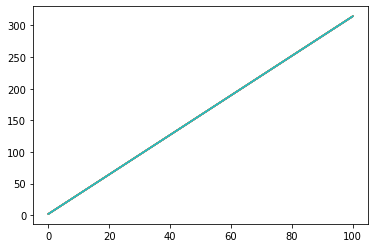

In [34]:
# 模型训练阶段，设置迭代轮次，每次通过将样本逐个输入模型，进行梯度下降优化操作，每轮迭代后，绘制出模型曲线

step = 0 # 记录训练步数
loss_list = [] # 用于保存loss值的列表

# 开始训练，轮数为epoch，采用SGD随机梯度下降优化方法
for epoch in range(train_epochs):
    for xs, ys in zip(x_data, y_data):
        _, loss = sess.run([optimmizer, loss_function], feed_dict={x: xs, y:ys})
        
        # 显示损失值loss
        # display_step:控制报告的粒度
        # 例如，如果display_step设为2，则将每训练2个样本输出一次损失值
        # 与超参数不同，修改display_step不会更改模型所学习的规律
        loss_list.append(loss)
        step = step + 1
        if step % display_step == 0:
            print('Train Epoch:', '%02d' % (epoch+1), 'Step:%03d' % (step),
                 "loss=", "{:.9f}".format(loss))
            
    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    
    plt.plot(x_data, w0temp*x_data+b0temp)# 画图

Train Epoch: 01 Step:020 loss= 715.828979492
Train Epoch: 01 Step:040 loss= 4020.585693359
Train Epoch: 01 Step:060 loss= 34.316585541
Train Epoch: 01 Step:080 loss= 78.696441650
Train Epoch: 01 Step:100 loss= 431.592437744
Train Epoch: 01 Step:120 loss= 0.000026364
Train Epoch: 01 Step:140 loss= 3510.611328125
Train Epoch: 01 Step:160 loss= 3.108089924
Train Epoch: 01 Step:180 loss= 1046.280029297
Train Epoch: 01 Step:200 loss= 619.457397461
Train Epoch: 01 Step:220 loss= 1827.533203125
Train Epoch: 01 Step:240 loss= 2526.782714844
Train Epoch: 01 Step:260 loss= 0.146300182
Train Epoch: 01 Step:280 loss= 956.755065918
Train Epoch: 01 Step:300 loss= 342.588256836
Train Epoch: 01 Step:320 loss= 540.316345215
Train Epoch: 01 Step:340 loss= 1090.892089844
Train Epoch: 01 Step:360 loss= 554.888732910
Train Epoch: 01 Step:380 loss= 1701.259155273
Train Epoch: 01 Step:400 loss= 1782.971801758
Train Epoch: 01 Step:420 loss= 2435.737792969
Train Epoch: 01 Step:440 loss= 241.251007080
Train Epo

Train Epoch: 08 Step:3680 loss= 1046.448852539
Train Epoch: 08 Step:3700 loss= 619.355224609
Train Epoch: 08 Step:3720 loss= 1827.664916992
Train Epoch: 08 Step:3740 loss= 2526.885498047
Train Epoch: 08 Step:3760 loss= 0.146673948
Train Epoch: 08 Step:3780 loss= 956.755065918
Train Epoch: 08 Step:3800 loss= 342.573577881
Train Epoch: 08 Step:3820 loss= 540.281555176
Train Epoch: 08 Step:3840 loss= 1090.825561523
Train Epoch: 08 Step:3860 loss= 554.831237793
Train Epoch: 08 Step:3880 loss= 1701.142089844
Train Epoch: 08 Step:3900 loss= 1783.094238281
Train Epoch: 08 Step:3920 loss= 2435.599365234
Train Epoch: 08 Step:3940 loss= 241.209304810
Train Epoch: 08 Step:3960 loss= 158.982482910
Train Epoch: 08 Step:3980 loss= 66.773056030
Train Epoch: 08 Step:4000 loss= 1044.671630859
Train Epoch: 09 Step:4020 loss= 715.469421387
Train Epoch: 09 Step:4040 loss= 4019.776367188
Train Epoch: 09 Step:4060 loss= 34.246318817
Train Epoch: 09 Step:4080 loss= 78.795692444
Train Epoch: 09 Step:4100 loss

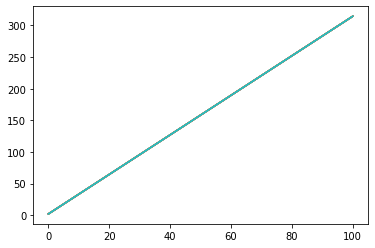

In [35]:
# 模型训练阶段，设置迭代轮次，每次通过将样本逐个输入模型，进行梯度下降优化操作，每轮迭代后，绘制出模型曲线

step = 0 # 记录训练步数
loss_list = [] # 用于保存loss值的列表

# 开始训练，轮数为epoch，采用SGD随机梯度下降优化方法
for epoch in range(train_epochs):
    for xs, ys in zip(x_data, y_data):
        _, loss = sess.run([optimmizer, loss_function], feed_dict={x: xs, y:ys})
        
        # 显示损失值loss
        # display_step:控制报告的粒度
        # 例如，如果display_step设为2，则将每训练2个样本输出一次损失值
        # 与超参数不同，修改display_step不会更改模型所学习的规律
        loss_list.append(loss)
        step = step + 1
        if step % display_step == 0:
            print('Train Epoch:', '%02d' % (epoch+1), 'Step:%03d' % (step),
                 "loss=", "{:.9f}".format(loss))
            
    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    
    plt.plot(x_data, w0temp*x_data+b0temp)# 画图

## 打印结果

In [36]:
print('w:', sess.run(w))
print('b:', sess.run(b) )

w: 3.1255205
b: 2.0201933


## 图形化显示损失值

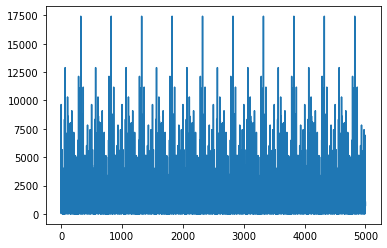

In [37]:
plt.plot(loss_list)

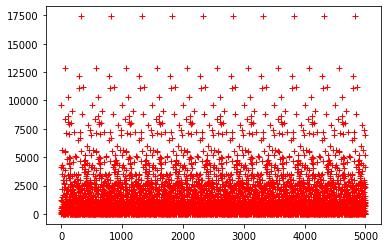

In [38]:
plt.plot(loss_list, 'r+')

In [39]:
[x for x in loss_list if x>1]

[346.61862,
 150.4717,
 9642.953,
 83.113785,
 28.632874,
 4130.034,
 1253.4391,
 515.3085,
 71.72171,
 149.58711,
 2185.2559,
 52.289345,
 179.28029,
 630.1229,
 4307.161,
 731.3656,
 2210.8105,
 5663.379,
 3538.748,
 715.829,
 1464.1719,
 1109.7811,
 1150.1245,
 254.00409,
 1666.345,
 867.7661,
 11.054882,
 184.25009,
 1.1893939,
 10.749172,
 1068.0248,
 590.8396,
 9.522634,
 1.2895204,
 119.36061,
 78.5253,
 2953.667,
 6.3906193,
 4020.5857,
 127.59844,
 330.16077,
 24.703756,
 229.73204,
 137.37859,
 2768.0522,
 2162.0498,
 428.1845,
 157.33617,
 9.692686,
 3300.117,
 95.0207,
 2656.032,
 711.7315,
 492.4509,
 2209.1628,
 11.463199,
 8336.5625,
 736.5615,
 34.316586,
 274.42566,
 1580.2754,
 77.031784,
 1031.204,
 556.3236,
 1.8548764,
 2343.701,
 4.466764,
 12895.54,
 1052.6543,
 5513.6167,
 3898.0466,
 5433.4194,
 264.28708,
 2093.8508,
 3028.838,
 1280.064,
 52.288616,
 532.6283,
 78.69644,
 7124.964,
 216.0999,
 938.9933,
 1015.7948,
 1723.2526,
 1866.5087,
 767.1582,
 61.97856

## 随机梯度下降  
在梯度下降法中，批量指的是用于在单次迭代中计算梯度的样本总数。  

假定批量是指整个数据集，数据集通常包含很大样本（数万甚至数千亿），此外，数据集通常包含多个特征。因此，一个批量可能相当巨大。如果是超大批量，则单词迭代就可能要花费很长时间进行计算。  

随机梯度下降法（SGD）每次迭代只使用一个样本（批量大小为1），如果进行足够的迭代，SGD也可以发挥作用。“随机”这一术语表示构成各个批量的一个样本都是随机选择的。  

小批量随机梯度下降法（小批量SGD）是介于全批量与SGD之间的折衷方案。小批量通常包含10-1000个随机选择的样本。小批量SGD可以减少SGD中的杂乱样本数量，但仍然 比全批量更高效。

## 进行预测


In [40]:
x_test = 3.21

predict = sess.run(pred, feed_dict={x:x_test})
print('预测值：%f'%predict)

target = 2*x_test + 1.0
print('目标值：%f'%target)

预测值：12.053114
目标值：7.420000
